# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [2]:
df = pd.read_excel("source/KyotoFullFlower7.xls")
df.head(30)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN
5,Column D; Source code,NaN,NaN,NaN,NaN,NaN
6,"1; Reported by Taguchi (1939), J. Marine Mete...",NaN,NaN,NaN,NaN,NaN
7,"2; Added by Sekiguchi (1969), Tokyo Geography...",NaN,NaN,NaN,NaN,NaN
8,"3; Added by Aono and Omoto (1994), J. Agric. ...",NaN,NaN,NaN,NaN,NaN
9,"4; Added by Aono and Kazui (2008), Int. J. Cl...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [3]:
df = pd.read_excel("source/KyotoFullFlower7.xls", skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [4]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [5]:
df = pd.read_excel("source/KyotoFullFlower7.xls", skiprows=25, na_values="-")
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 5. What source is the most common as a reference?

In [6]:
df['Reference Name'].value_counts().head(1)

NEWS-PAPER(ARASHIYAMA)    94
Name: Reference Name, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [7]:
# df[df['Full-flowering date (DOY)'].isna(False)].value_counts()
df.dropna(subset=['Full-flowering date (DOY)'])

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
11,812,92.0,401.0,1.0,2.0,NIHON-KOKI
14,815,105.0,415.0,1.0,2.0,NIHON-KOKI
30,831,96.0,406.0,1.0,2.0,NIHON-KOKI
50,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
52,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU
63,864,100.0,409.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
65,866,106.0,416.0,1.0,2.0,NIPPON-SANDAI-JITSUROKU
68,869,95.0,405.0,5.0,2.0,KANKE-BUNSOU
88,889,104.0,414.0,5.0,2.0,NIPPON-SANDAI-JITSUROKU
90,891,109.0,419.0,5.0,4.0,NIHONKIRYAKU


## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

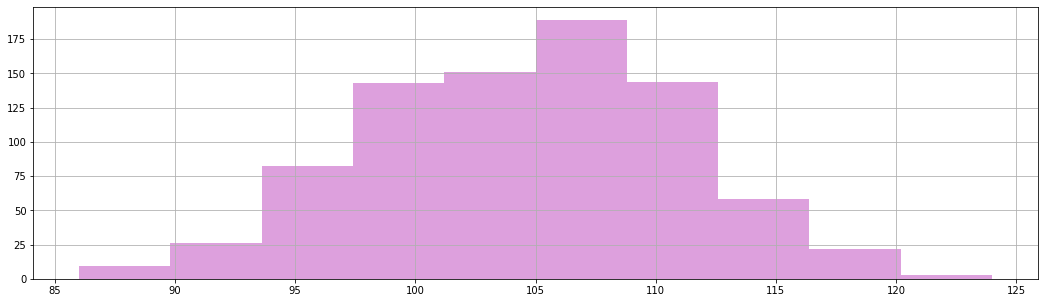

In [8]:
df['Full-flowering date (DOY)'].dropna().hist(bins=10, figsize=(18,5), color='plum')

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

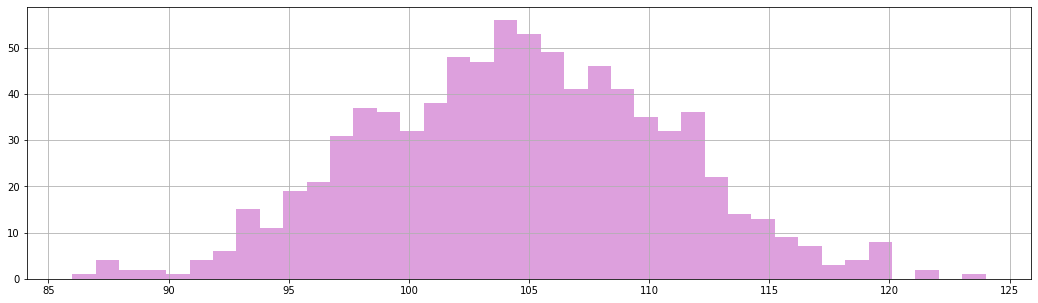

In [9]:
df['Full-flowering date (DOY)'].dropna().hist(bins=39, figsize=(18,5), color='plum')

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [10]:
df['Full-flowering date (DOY)'].describe().round(2)

count    827.00
mean     104.54
std        6.41
min       86.00
25%      100.00
50%      105.00
75%      109.00
max      124.00
Name: Full-flowering date (DOY), dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [11]:
df[df.AD < 1900]['Full-flowering date (DOY)'].mean().round(1)

105.2

## 11. How about after 1900?

In [12]:
df[df.AD >= 1900]['Full-flowering date (DOY)'].mean().round(1)

100.3

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [13]:
#
#
# I know this is way more than was being asked but wanted to test out merges and cliping list imports.
#
#

In [14]:
df = df.rename(columns={'Data type code':'Data code'})

In [15]:
codesource_df = pd.read_excel("source/KyotoFullFlower7.xls", usecols=[0], skiprows=6, nrows=8, names=['Source code'])
codesource_df 

,Source code
0,"1; Reported by Taguchi (1939), J. Marine Mete..."
1,"2; Added by Sekiguchi (1969), Tokyo Geography..."
2,"3; Added by Aono and Omoto (1994), J. Agric. ..."
3,"4; Added by Aono and Kazui (2008), Int. J. Cl..."
4,"5: Cherry phenological data, Added by Aono an..."
5,"6: Added by Aono (2011), Time Studies, 4, 17-..."
6,"7: Added by Aono (2012), Chikyu Kankyo, 17, 2..."
7,8: Found after the last publication of articles.


In [16]:
codesource_df['Source type'] = codesource_df['Source code'].str.extract("....(.*)", expand=False)
codesource_df['Source code'] = codesource_df['Source code'].str.extract(".(.).*", expand=False)
codesource_df['Source code'] = codesource_df['Source code'].astype(float)

In [17]:
codesource_df['Source type']

0    Reported by Taguchi (1939), J. Marine Meteorol...
1    Added by Sekiguchi (1969), Tokyo Geography Pap...
2    Added by Aono and Omoto (1994), J. Agric. Mete...
3    Added by Aono and Kazui (2008), Int. J. Climat...
4    Cherry phenological data, Added by Aono and Sa...
5    Added by Aono (2011), Time Studies, 4, 17-29. ...
6    Added by Aono (2012), Chikyu Kankyo, 17, 21-29...
7        Found after the last publication of articles.
Name: Source type, dtype: object

In [18]:
codedata_df = pd.read_excel("source/KyotoFullFlower7.xls", usecols=[0], skiprows=15, nrows=7, names=['Data code'])
codedata_df['Data code'] = codedata_df['Data code'].str.replace("poety", "poetry")
codedata_df

,Data code
0,0 : data from modern times (full-bloom date s...
1,1 : from diary description about full-bloom
2,2 : from diary description about cherry bloss...
3,3 : from diary description about presents of ...
4,4 : title in Japanese poetry
5,"8 : Deduced from wisteria phenology, using th..."
6,"9 : Deduced from Japanese kerria phenology, u..."


In [19]:
codedata_df['Data type'] = codedata_df['Data code'].str.extract("....(.*)", expand=False)
codedata_df['Data code'] = codedata_df['Data code'].str.extract(".(.).*", expand=False)
codedata_df['Data code'] = codedata_df['Data code'].astype(float)

In [20]:
codedata_df['Data type']

0     data from modern times (full-bloom date since...
1              from diary description about full-bloom
2     from diary description about cherry blossom v...
3     from diary description about presents of cher...
4                             title in Japanese poetry
5     Deduced from wisteria phenology, using the re...
6     Deduced from Japanese kerria phenology, using...
Name: Data type, dtype: object

In [21]:
merge_df = df.merge(codedata_df, left_on='Data code', right_on='Data code')
merge_df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data code,Reference Name,Data type
0,812,92.0,401.0,1.0,2.0,NIHON-KOKI,from diary description about cherry blossom v...
1,815,105.0,415.0,1.0,2.0,NIHON-KOKI,from diary description about cherry blossom v...
2,831,96.0,406.0,1.0,2.0,NIHON-KOKI,from diary description about cherry blossom v...
3,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,from diary description about cherry blossom v...
4,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,from diary description about cherry blossom v...


In [22]:
merge_df = merge_df.merge(codesource_df, left_on='Source code', right_on='Source code')
merge_df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data code,Reference Name,Data type,Source type
0,812,92.0,401.0,1.0,2.0,NIHON-KOKI,from diary description about cherry blossom v...,"Reported by Taguchi (1939), J. Marine Meteorol..."
1,815,105.0,415.0,1.0,2.0,NIHON-KOKI,from diary description about cherry blossom v...,"Reported by Taguchi (1939), J. Marine Meteorol..."
2,831,96.0,406.0,1.0,2.0,NIHON-KOKI,from diary description about cherry blossom v...,"Reported by Taguchi (1939), J. Marine Meteorol..."
3,851,108.0,418.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,from diary description about cherry blossom v...,"Reported by Taguchi (1939), J. Marine Meteorol..."
4,853,104.0,414.0,1.0,2.0,MONTOKUTENNO-JITSUROKU,from diary description about cherry blossom v...,"Reported by Taguchi (1939), J. Marine Meteorol..."


In [23]:
merge_df[merge_df['Data type'].str.contains("poetry", na=False)]['Data type'].value_counts()

 title in Japanese poetry    39
Name: Data type, dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [24]:
merge_df[merge_df['Data type'].str.contains("poetry", na=False)]['AD']

126     891
127     895
128     896
129     923
130     955
131     969
132    1007
133    1033
134    1036
135    1060
136    1084
137    1095
138    1190
139    1201
140    1216
141    1219
142    1221
143    1223
144    1271
145    1324
280    1301
281    1592
282    1846
283    1863
609    1269
610    1289
611    1447
612    1453
613    1454
614    1474
615    1534
616    1640
788    1236
789    1330
790    1661
814    1061
815    1182
816    1265
817    1268
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

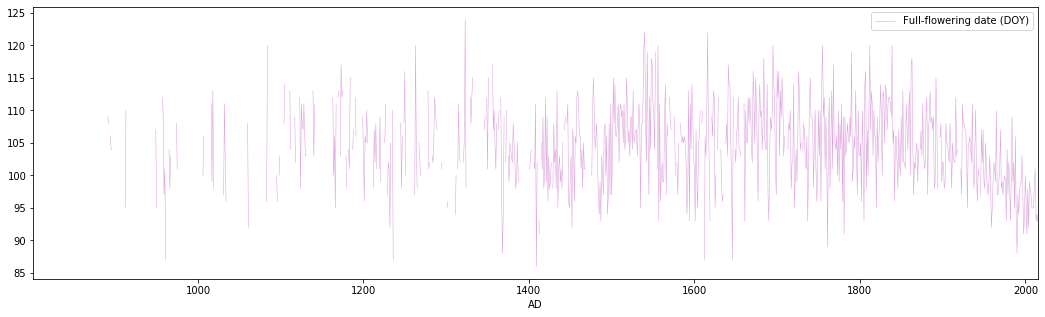

In [25]:
df.plot(x='AD', y='Full-flowering date (DOY)', figsize=(18, 5), lw=0.5, c='plum')

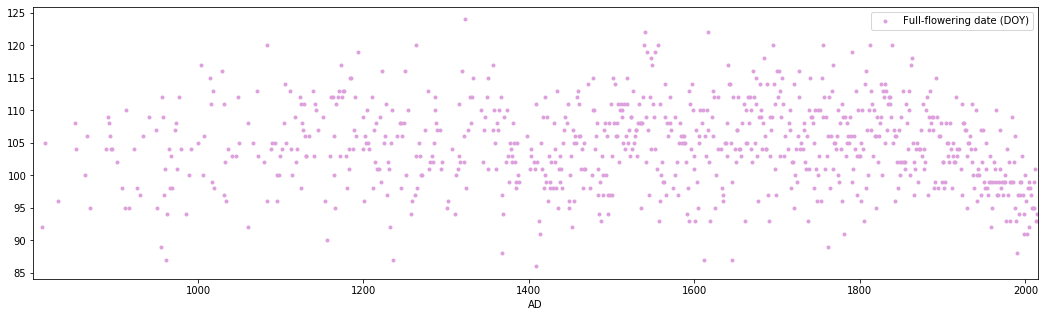

In [26]:
df.plot(x='AD', y='Full-flowering date (DOY)', figsize=(18, 5), linestyle='', marker='.', c='plum')

## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [27]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full-flowering date (DOY), dtype: float64

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

In [28]:
df['Rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean()
df['Rolling_date']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1185    99.65
1186    99.55
1187    99.90
1188    99.50
1189    98.55
1190    98.50
1191    98.25
1192    98.25
1193    98.25
1194    98.20
1195    98.40
1196    98.60
1197    97.95
1198    97.80
1199    97.70
1200    97.55
1201    97.45
1202    97.40
1203    96.55
1204    96.55
1205    96.35
1206    96.45
1207    95.90
1208    96.00
1209    96.35
1210    96.45
1211    96.80
1212    96.60
1213    96.35
1214    96.05
Name: Rolling_date, Length: 1215, dtype: float64

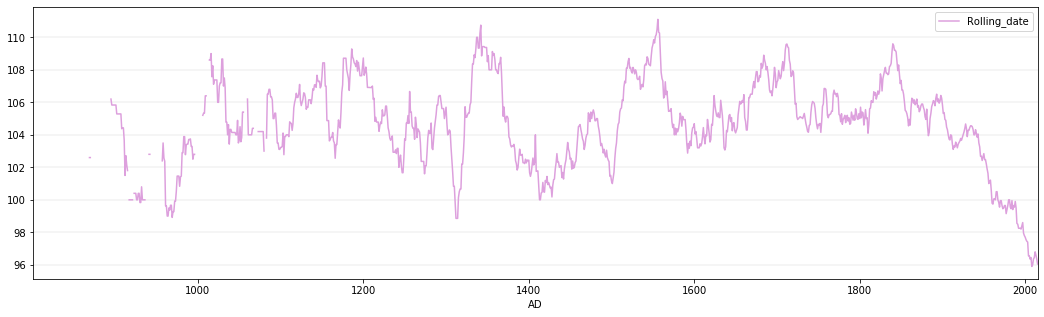

In [29]:
df.plot(x='AD', y='Rolling_date', figsize=(18, 5), c='plum').yaxis.grid(linewidth=0.25)

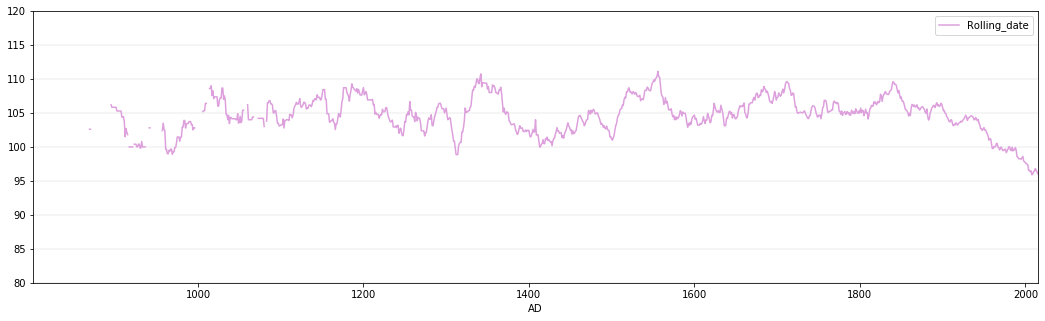

In [30]:
df.plot(x='AD', y='Rolling_date', ylim=(80, 120), figsize=(18, 5), c='plum').yaxis.grid(linewidth=0.25)

## 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [31]:
df['Full-flowering date'].describe()

count    827.000000
mean     413.717050
std       12.381731
min      327.000000
25%      410.000000
50%      414.000000
75%      419.000000
max      504.000000
Name: Full-flowering date, dtype: float64

In [32]:
df.loc[df['Full-flowering date'] < 400, 'Flower_month'] = 'March'
df.loc[(df['Full-flowering date'] >= 400) & (df['Full-flowering date'] < 500), 'Flower_month'] = 'April'
df.loc[df['Full-flowering date'] >= 500, 'Flower_month'] = 'May'

## 17. Using your new column, how many blossomings happened in each month?

In [33]:
df.Flower_month.value_counts()

April    814
March     10
May        3
Name: Flower_month, dtype: int64

## 18. Graph how many blossomings happened in each month.

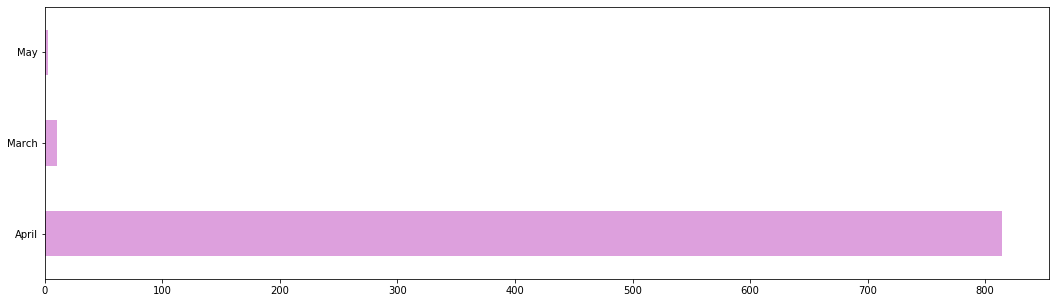

In [34]:
df.Flower_month.value_counts().plot(kind='barh', figsize=(18, 5), color='plum')

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

In [35]:
df['Flower_day'] = df['Full-flowering date'].dropna().astype(str).str.extract(".(..).*", expand=False).astype(int).head(20)
df['Flower_day'].dtype

dtype('float64')

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [44]:
df['Full-flowering date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full-flowering date, dtype: int32

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [37]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[0] + "!!!").head()

11    4!!!
14    4!!!
30    4!!!
50    4!!!
52    4!!!
Name: Full-flowering date, dtype: object

In [1]:
#
#
# I don't follow and can't find the right terms to google what's going on with the exclamation points above.
#
#

In [39]:
df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[1] + value[2]).head()

11    01
14    15
30    06
50    18
52    14
Name: Full-flowering date, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [40]:
df['Flower_day'] = df['Full-flowering date'].dropna().astype(int).astype(str).apply(lambda value: value[1] + value[2])
df['Flower_day']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11       01
12      NaN
13      NaN
14       15
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
       ... 
1185     12
1186     05
1187     15
1188     03
1189     29
1190     07
1191     03
1192     07
1193     09
1194     09
1195     12
1196     07
1197     01
1198     04
1199     09
1200     06
1201     01
1202     08
1203     01
1204     09
1205     08
1206     07
1207     04
1208     05
1209     05
1210     09
1211     10
1212     03
1213     04
1214     03
Name: Flower_day, Length: 1215, dtype: object

### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [49]:
df['date'] = df.Flower_month.dropna().map(str) + '-' + df.Flower_day.dropna().map(str)
# df.Flower_month + '-' + df.Flower_day
df.date

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11      April-01
12           NaN
13           NaN
14      April-15
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
28           NaN
29           NaN
          ...   
1185    April-12
1186    April-05
1187    April-15
1188    April-03
1189    March-29
1190    April-07
1191    April-03
1192    April-07
1193    April-09
1194    April-09
1195    April-12
1196    April-07
1197    April-01
1198    April-04
1199    April-09
1200    April-06
1201    April-01
1202    April-08
1203    April-01
1204    April-09
1205    April-08
1206    April-07
1207    April-04
1208    April-05
1209    April-05
1210    April-09
1211    April-10
1212    April-

# YOU ARE DONE.

And **incredible.**

In [42]:
# Save your flowery words for someone less hardened by coding all day & night.